In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
train=pd.read_csv("train_new.csv")
test=pd.read_csv("test_new.csv")

In [42]:
print('trainデータ')
print(train.shape)
print('testデータ')
print(test.shape)

trainデータ
(1953, 43)
testデータ
(313, 42)


In [43]:
#全変数を確認
train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa'],
      dtype='object')

In [44]:
#全体の欠損値の確認
print(train.isnull().values.sum())

0


In [45]:
#観客数が０のところを探す
from IPython.display import display
for i in range(len(train)):
    if train["y"][i]==0:
        display(train.loc[[i]])

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
1567,15699,0,2014,Ｊ１,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,...,カルフィン ヨン ア ピン,吉田 豊,河井 陽介,六平 光成,竹内 涼,大前 元紀,ノヴァコヴィッチ,長沢 駿,埼玉県さいたま市緑区中野田500,63700


In [46]:
#無観客試合のデータを削除
train=train.drop(1567,axis=0)
#indexを振り直し
train=train.reset_index(drop=True)

In [47]:
train=train.reset_index(drop=True)
from IPython.display import display
for i in range(len(train)):
    if train["y"][i]==0:
        display(train.loc[[i]])

In [48]:
#ザスパクサツ群馬をザスパ草津に変更
for i in range(len(train)):
    if train["home"][i]=="ザスパクサツ群馬":
        train["home"][i]="ザスパ草津"
for i in range(len(train)):
    if train["away"][i]=="ザスパクサツ群馬":
        train["away"][i]="ザスパ草津"
#ザスパクサツ群馬をザスパ草津に変更
for i in range(len(test)):
    if test["home"][i]=="ザスパクサツ群馬":
        test["home"][i]="ザスパ草津"
for i in range(len(test)):
    if test["away"][i]=="ザスパクサツ群馬":
        test["away"][i]="ザスパ草津"

C:\Users\hamha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\hamha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hamha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hamha\Anaconda3\lib\site-packages

In [49]:
#回帰で使いやすくするために湿度の%を消す。
def humiditydrop(df_train):
    df_train["humidity"]=df_train["humidity"].str.replace("%","")
    return df_train
train=humiditydrop(train)
test=humiditydrop(test)

In [50]:
#第n節n日を何試合目かに統一
def matchnumber(array_train_match):
    for i in range(len(array_train_match)):
        if array_train_match[i].find("１０")>-1:
            array_train_match[i]="10"
        elif array_train_match[i].find("１１")>-1:
            array_train_match[i]="11"
        elif array_train_match[i].find("１２")>-1:
            array_train_match[i]="12"
        elif array_train_match[i].find("１３")>-1:
            array_train_match[i]="13"
        elif array_train_match[i].find("１４")>-1:
            array_train_match[i]="14"
        elif array_train_match[i].find("１５")>-1:
            array_train_match[i]="15"
        elif array_train_match[i].find("１６")>-1:
            array_train_match[i]="16"
        elif array_train_match[i].find("１７")>-1:
            array_train_match[i]="17"
        elif array_train_match[i].find("１８")>-1:
            array_train_match[i]="18"
        elif array_train_match[i].find("１９")>-1:
            array_train_match[i]="19"
        elif array_train_match[i].find("２０")>-1:
            array_train_match[i]="20"
        elif array_train_match[i].find("２１")>-1:
            array_train_match[i]="21"
        elif array_train_match[i].find("２２")>-1:
            array_train_match[i]="22"
        elif array_train_match[i].find("２３")>-1:
            array_train_match[i]="23"
        elif array_train_match[i].find("２４")>-1:
            array_train_match[i]="24"
        elif array_train_match[i].find("２５")>-1:
            array_train_match[i]="25"
        elif array_train_match[i].find("２６")>-1:
            array_train_match[i]="26"
        elif array_train_match[i].find("２７")>-1:
            array_train_match[i]="27"
        elif array_train_match[i].find("２８")>-1:
            array_train_match[i]="28"
        elif array_train_match[i].find("２９")>-1:
            array_train_match[i]="29"
        elif array_train_match[i].find("３０")>-1:
            array_train_match[i]="30"
        elif array_train_match[i].find("３１")>-1:
            array_train_match[i]="31"
        elif array_train_match[i].find("３２")>-1:
            array_train_match[i]="32"
        elif array_train_match[i].find("３３")>-1:
            array_train_match[i]="33"
        elif array_train_match[i].find("３４")>-1:
            array_train_match[i]="34"
        elif array_train_match[i].find("３５")>-1:
            array_train_match[i]="35"
        elif array_train_match[i].find("３６")>-1:
            array_train_match[i]="36"
        elif array_train_match[i].find("３７")>-1:
            array_train_match[i]="37"
        elif array_train_match[i].find("３８")>-1:
            array_train_match[i]="38"
        elif array_train_match[i].find("３９")>-1:
            array_train_match[i]="39"
        elif array_train_match[i].find("４０")>-1:
            array_train_match[i]="40"
        elif array_train_match[i].find("４１")>-1:
            array_train_match[i]="41"
        elif array_train_match[i].find("４２")>-1:
            array_train_match[i]="42"
        elif array_train_match[i].find("第１節")>-1:
            array_train_match[i]="1"
        elif array_train_match[i].find("第２節")>-1:
            array_train_match[i]="2"
        elif array_train_match[i].find("第３節")>-1:
            array_train_match[i]="3"
        elif array_train_match[i].find("第４節")>-1:
            array_train_match[i]="4"
        elif array_train_match[i].find("第５節")>-1:
            array_train_match[i]="5"
        elif array_train_match[i].find("第６節")>-1:
            array_train_match[i]="6"
        elif array_train_match[i].find("第７節")>-1:
            array_train_match[i]="7"
        elif array_train_match[i].find("第８節")>-1:
            array_train_match[i]="8"
        elif array_train_match[i].find("第９節")>-1:
            array_train_match[i]="9"
    return array_train_match
train_match=matchnumber(np.array(train["match"]))
test_match=matchnumber(np.array(test["match"]))
train=pd.concat([train,pd.DataFrame(train_match)],axis=1)
test=pd.concat([test,pd.DataFrame(test_match)],axis=1)
train=train.rename(columns={0:"match number"})
test=test.rename(columns={0:"match number"})

In [51]:
#曜日生成
def dayofweek(array_gameday):
    for i in range(len(array_gameday)):
        if array_gameday[i].find("祝")>-1:
            array_gameday[i]="祝"
        elif array_gameday[i].find("日")>-1:
            array_gameday[i]="日"
        elif array_gameday[i].find("土")>-1:
            array_gameday[i]="土"
        else:
            array_gameday[i]="平"
    return array_gameday
train_week=dayofweek(np.array(train["gameday"]))
test_week=dayofweek(np.array(test["gameday"]))
train=pd.concat([train,pd.DataFrame(train_week)],axis=1)
test=pd.concat([test,pd.DataFrame(test_week)],axis=1)
train=train.rename(columns={0:"day of week"})
test=test.rename(columns={0:"day of week"})

In [52]:
#分を消し,時のみに
def time(array_train_time):
    for i in range(len(array_train_time)):
        if (array_train_time[i].find(":3") > -1)or(array_train_time[i].find(":4") > -1):
            if array_train_time[i].find("12:") > -1:
                array_train_time[i]=12.5
            elif array_train_time[i].find("13:")>-1:
                array_train_time[i]=13.5
            elif array_train_time[i].find("14:")>-1:
                array_train_time[i]=14.5
            elif array_train_time[i].find("15:")>-1:
                array_train_time[i]=15.5
            elif array_train_time[i].find("16:")>-1:
                array_train_time[i]=16.5
            elif array_train_time[i].find("17:")>-1:
                array_train_time[i]=17.5
            elif array_train_time[i].find("18:")>-1:
                array_train_time[i]=18.5
            elif array_train_time[i].find("19:")>-1:
                array_train_time[i]=19.5
        else:
            if array_train_time[i].find("12:") > -1:
                array_train_time[i]=12
            elif array_train_time[i].find("13:")>-1:
                array_train_time[i]=13
            elif array_train_time[i].find("14:")>-1:
                array_train_time[i]=14
            elif array_train_time[i].find("15:")>-1:
                array_train_time[i]=15
            elif array_train_time[i].find("16:")>-1:
                array_train_time[i]=16
            elif array_train_time[i].find("17:")>-1:
                array_train_time[i]=17
            elif array_train_time[i].find("18:")>-1:
                array_train_time[i]=18
            elif array_train_time[i].find("19:")>-1:
                array_train_time[i]=19
            elif array_train_time[i].find("20:")>-1:
                array_train_time[i]=20
    return array_train_time
train_time=time(np.array(train["time"]))
test_time=time(np.array(test["time"]))
train=pd.concat([train,pd.DataFrame(train_time)],axis=1)
test=pd.concat([test,pd.DataFrame(test_time)],axis=1)
train=train.rename(columns={0:"o'clock"})
test=test.rename(columns={0:"o'clock"})

In [53]:
#主天気に変換
def weather(array_train_weather):
    for i in range(len(array_train_weather)):
        if array_train_weather[i].startswith("曇"):
            array_train_weather[i]="曇"
        elif array_train_weather[i].startswith("雨"):
            array_train_weather[i]="雨"
        elif array_train_weather[i].startswith("晴"):
            array_train_weather[i]="晴"
        elif array_train_weather[i].startswith("雪"):
            array_train_weather[i]="雪"
        else:
            array_train_weather[i]="屋内"        
    return array_train_weather
train_weather=weather(np.array(train["weather"]))
test_weather=weather(np.array(test["weather"]))
train=pd.concat([train,pd.DataFrame(train_weather)],axis=1)
test=pd.concat([test,pd.DataFrame(test_weather)],axis=1)
train=train.rename(columns={0:"main weather"})
test=test.rename(columns={0:"main weather"})

In [54]:
#スタジアムの都道府県
pref = ['北海道', '青森県', '岩手県', '宮城県', '秋田県', 
    '山形県', '福島県', '茨城県', '栃木県', '群馬県', 
    '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', 
    '富山県', '石川県', '福井県', '山梨県', '長野県', 
    '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', 
    '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', 
    '鳥取県', '島根県', '岡山県', '広島県', '山口県', 
    '徳島県', '香川県', '愛媛県', '高知県', '福岡県', 
    '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', 
    '鹿児島県', '沖縄県']
def prefecture(array_prefecture):
    for i in range(len(array_prefecture)):
        for name in pref:
            if array_prefecture[i].find(name)>-1:
               array_prefecture[i]=name
    return array_prefecture
train_prefecture=prefecture(np.array(train["address"]))
test_prefecture=prefecture(np.array(test["address"]))
train=pd.concat([train,pd.DataFrame(train_prefecture)],axis=1)
test=pd.concat([test,pd.DataFrame(test_prefecture)],axis=1)
train=train.rename(columns={0:"prefecture"})
test=test.rename(columns={0:"prefecture"})

In [56]:
#前年度のステージを作成
#ホームチーム
def stagehome(df_all):
    stage_pre_home=[0]*len(df_all)
    for i in range(len(df_all)):
        if df_all["year"][i]==2012:
            if df_all["stage"][i]=='Ｊ１':
                if df_all["home"][i]=="ＦＣ東京" or df_all["home"][i]=="サガン鳥栖" or df_all["home"][i]=="コンサドーレ札幌":
                    stage_pre_home[i]="Ｊ２"
                else:
                    stage_pre_home[i]="Ｊ１"
            else:
                if df_all["home"][i]=="ヴァンフォーレ甲府" or df_all["home"][i]=="アビスパ福岡" or df_all["home"][i]=="モンテディオ山形":
                    stage_pre_home[i]="Ｊ１"
                else:
                    stage_pre_home[i]="Ｊ２"
        elif df_all["year"][i]==2013:
            if df_all["stage"][i]=='Ｊ１':
                if df_all["home"][i]=="ヴァンフォーレ甲府" or df_all["home"][i]=="湘南ベルマーレ" or df_all["home"][i]=="大分トリニータ":
                    stage_pre_home[i]="Ｊ２"
                else:
                    stage_pre_home[i]="Ｊ１"
            else:
                if df_all["home"][i]=="ガンバ大阪" or df_all["home"][i]=="ヴィッセル神戸" or df_all["home"][i]=="コンサドーレ札幌":
                    stage_pre_home[i]="Ｊ１"
                else:
                    stage_pre_home[i]="Ｊ２"
        else:
            if df_all["stage"][i]=='Ｊ１':
                if df_all["home"][i]=="ガンバ大阪" or df_all["home"][i]=="ヴィッセル神戸" or df_all["home"][i]=="徳島ヴォルティス":
                    stage_pre_home[i]="Ｊ２"
                else:
                    stage_pre_home[i]="Ｊ１"
            else:
                if df_all["home"][i]=="ジュビロ磐田" or df_all["home"][i]=="大分トリニータ" or df_all["home"][i]=="湘南ベルマーレ":
                    stage_pre_home[i]="Ｊ１"
                else:
                    stage_pre_home[i]="Ｊ２"
    return stage_pre_home
train_stagehome=stagehome(train)
test_stagehome=stagehome(test)
train=pd.concat([train,pd.DataFrame(train_stagehome)],axis=1)
test=pd.concat([test,pd.DataFrame(test_stagehome)],axis=1)
train=train.rename(columns={0:"stage pre home"})
test=test.rename(columns={0:"stage pre home"})

In [57]:
#次はアウェイ
def stageaway(df_all):
    stage_pre_away=[0]*len(df_all)
    for i in range(len(df_all)):
        if df_all["year"][i]==2012:
            if df_all["stage"][i]=='Ｊ１':
                if df_all["away"][i]=="ＦＣ東京" or df_all["away"][i]=="サガン鳥栖" or df_all["away"][i]=="コンサドーレ札幌":
                    stage_pre_away[i]="Ｊ２"
                else:
                    stage_pre_away[i]="Ｊ１"
            else:
                if df_all["away"][i]=="ヴァンフォーレ甲府" or df_all["away"][i]=="アビスパ福岡" or df_all["away"][i]=="モンテディオ山形":
                    stage_pre_away[i]="Ｊ１"
                else:
                    stage_pre_away[i]="Ｊ２"
        elif df_all["year"][i]==2013:
            if df_all["stage"][i]=='Ｊ１':
                if df_all["away"][i]=="ヴァンフォーレ甲府" or df_all["away"][i]=="湘南ベルマーレ" or df_all["away"][i]=="大分トリニータ":
                    stage_pre_away[i]="Ｊ２"
                else:
                    stage_pre_away[i]="Ｊ１"
            else:
                if df_all["away"][i]=="ガンバ大阪" or df_all["away"][i]=="ヴィッセル神戸" or df_all["away"][i]=="コンサドーレ札幌":
                    stage_pre_away[i]="Ｊ１"
                else:
                    stage_pre_away[i]="Ｊ２"
        else:
            if df_all["stage"][i]=='Ｊ１':
                if df_all["away"][i]=="ガンバ大阪" or df_all["away"][i]=="ヴィッセル神戸" or df_all["away"][i]=="徳島ヴォルティス":
                    stage_pre_away[i]="Ｊ２"
                else:
                    stage_pre_away[i]="Ｊ１"
            else:
                if df_all["away"][i]=="ジュビロ磐田" or df_all["away"][i]=="大分トリニータ" or df_all["away"][i]=="湘南ベルマーレ":
                    stage_pre_away[i]="Ｊ１"
                else:
                    stage_pre_away[i]="Ｊ２"
    return stage_pre_away
train_stageaway=stageaway(train)
test_stageaway=stageaway(test)
train=pd.concat([train,pd.DataFrame(train_stageaway)],axis=1)
test=pd.concat([test,pd.DataFrame(test_stageaway)],axis=1)
train=train.rename(columns={0:"stage pre away"})
test=test.rename(columns={0:"stage pre away"})

In [58]:
#昼夕方夜追加
def time_zone(evening):
    timezone=["a"]*len(evening)
    for i in range(len(evening)):
        if 15 <= evening[i] and evening[i] <= 18:
            timezone[i]='夕'
        elif 18 < evening[i]:
            timezone[i]='夜'
        else:
            timezone[i]='昼'
    return timezone
train_timezone=time_zone(np.array(train["o'clock"]))
test_timezone=time_zone(np.array(test["o'clock"]))
train=pd.concat([train,pd.DataFrame(train_timezone)],axis=1)
test=pd.concat([test,pd.DataFrame(test_timezone)],axis=1)
train=train.rename(columns={0:"time zone"})
test=test.rename(columns={0:"time zone"})

In [59]:
#2011-2013の合計観客数を入力
def sum_(df_all):
    sumy=[0]*len(df_all)
    for i in range(len(df_all)):
        if df_all["year"][i]==2012:
            if df_all["stage"][i]=='Ｊ１':
                sumy[i]=4833782
            else:
                sumy[i]=2440695
        elif df_all["year"][i]==2013:
            if df_all["stage"][i]=='Ｊ１':
                sumy[i]=5375300
            else:
                sumy[i]=2681881
        else:
            if df_all["stage"][i]=='Ｊ１':
                sumy[i]=5271047
            else:
                sumy[i]=3079181
    return sumy
train_sum=sum_(train)
test_sum=sum_(test)
train=pd.concat([train,pd.DataFrame(train_sum)],axis=1)
test=pd.concat([test,pd.DataFrame(test_sum)],axis=1)
train=train.rename(columns={0:"sum"})
test=test.rename(columns={0:"sum"})

In [60]:
#ホームチームの去年の勝ち点を入力
def homepoints(df):
    home_points=[0]*len(df)
    for i in range(len(df)):
        if df["year"][i]==2012:
            if df["home"][i]=="柏レイソル":
                home_points[i]=72
            elif df["home"][i]=="名古屋グランパス":
                home_points[i]=71
            elif df["home"][i]=="ガンバ大阪":
                home_points[i]=70
            elif df["home"][i]=="ベガルタ仙台":
                home_points[i]=56
            elif df["home"][i]=="横浜Ｆ・マリノス":
                home_points[i]=56
            elif df["home"][i]=="鹿島アントラーズ":
                home_points[i]=50
            elif df["home"][i]=="サンフレッチェ広島":
                home_points[i]=50
            elif df["home"][i]=="ジュビロ磐田":
                home_points[i]=47
            elif df["home"][i]=="ヴィッセル神戸":
                home_points[i]=46
            elif df["home"][i]=="清水エスパルス":
                home_points[i]=45
            elif df["home"][i]=="川崎フロンターレ":
                home_points[i]=44
            elif df["home"][i]=="セレッソ大阪":
                home_points[i]=43
            elif df["home"][i]=="大宮アルディージャ":
                home_points[i]=42
            elif df["home"][i]=="アルビレックス新潟":
                home_points[i]=39
            elif df["home"][i]=="浦和レッズ":
                home_points[i]=36
            elif df["home"][i]=="ＦＣ東京":
                home_points[i]=25
            elif df["home"][i]=="サガン鳥栖":
                home_points[i]=25
            elif df["home"][i]=="コンサドーレ札幌":
                home_points[i]=25
            elif df["home"][i]=="ヴァンフォーレ甲府":
                home_points[i]=71
            elif df["home"][i]=="アビスパ福岡":
                home_points[i]=71
            elif df["home"][i]=="モンテディオ山形":
                home_points[i]=71
            elif df["home"][i]=="徳島ヴォルティス":
                home_points[i]=65
            elif df["home"][i]=="東京ヴェルディ":
                home_points[i]=59
            elif df["home"][i]=="ジェフユナイテッド千葉":
                home_points[i]=58
            elif df["home"][i]=="京都サンガF.C.":
                home_points[i]=58
            elif df["home"][i]=="ギラヴァンツ北九州":
                home_points[i]=58
            elif df["home"][i]=="ザスパ草津":
                home_points[i]=57
            elif df["home"][i]=="栃木ＳＣ":
                home_points[i]=56
            elif df["home"][i]=="ロアッソ熊本":
                home_points[i]=51
            elif df["home"][i]=="大分トリニータ":
                home_points[i]=50
            elif df["home"][i]=="ファジアーノ岡山":
                home_points[i]=48
            elif df["home"][i]=="湘南ベルマーレ":
                home_points[i]=46
            elif df["home"][i]=="愛媛ＦＣ":
                home_points[i]=44
            elif df["home"][i]=="カターレ富山":
                home_points[i]=43
            elif df["home"][i]=="水戸ホーリーホック":
                home_points[i]=42
            elif df["home"][i]=="横浜ＦＣ":
                home_points[i]=41
            elif df["home"][i]=="ガイナーレ鳥取":
                home_points[i]=31
            elif df["home"][i]=="ＦＣ岐阜":
                home_points[i]=24
            else:
                home_points[i]=24
        elif df["year"][i]==2013:
            if df["home"][i]=="柏レイソル":
                home_points[i]=52
            elif df["home"][i]=="名古屋グランパス":
                home_points[i]=52
            elif df["home"][i]=="ガンバ大阪":
                home_points[i]=78
            elif df["home"][i]=="ベガルタ仙台":
                home_points[i]=57
            elif df["home"][i]=="横浜Ｆ・マリノス":
                home_points[i]=53
            elif df["home"][i]=="鹿島アントラーズ":
                home_points[i]=46
            elif df["home"][i]=="サンフレッチェ広島":
                home_points[i]=64
            elif df["home"][i]=="ジュビロ磐田":
                home_points[i]=46
            elif df["home"][i]=="ヴィッセル神戸":
                home_points[i]=78
            elif df["home"][i]=="清水エスパルス":
                home_points[i]=49
            elif df["home"][i]=="川崎フロンターレ":
                home_points[i]=50
            elif df["home"][i]=="セレッソ大阪":
                home_points[i]=42
            elif df["home"][i]=="大宮アルディージャ":
                home_points[i]=44
            elif df["home"][i]=="アルビレックス新潟":
                home_points[i]=40
            elif df["home"][i]=="浦和レッズ":
                home_points[i]=55
            elif df["home"][i]=="ＦＣ東京":
                home_points[i]=48
            elif df["home"][i]=="サガン鳥栖":
                home_points[i]=53
            elif df["home"][i]=="コンサドーレ札幌":
                home_points[i]=78
            elif df["home"][i]=="ヴァンフォーレ甲府":
                home_points[i]=30
            elif df["home"][i]=="アビスパ福岡":
                home_points[i]=41
            elif df["home"][i]=="モンテディオ山形":
                home_points[i]=61
            elif df["home"][i]=="徳島ヴォルティス":
                home_points[i]=51
            elif df["home"][i]=="東京ヴェルディ":
                home_points[i]=66
            elif df["home"][i]=="ジェフユナイテッド千葉":
                home_points[i]=72
            elif df["home"][i]=="京都サンガF.C.":
                home_points[i]=74
            elif df["home"][i]=="ギラヴァンツ北九州":
                home_points[i]=64
            elif df["home"][i]=="ザスパ草津":
                home_points[i]=47
            elif df["home"][i]=="栃木ＳＣ":
                home_points[i]=60
            elif df["home"][i]=="ロアッソ熊本":
                home_points[i]=55
            elif df["home"][i]=="大分トリニータ":
                home_points[i]=30
            elif df["home"][i]=="ファジアーノ岡山":
                home_points[i]=65
            elif df["home"][i]=="湘南ベルマーレ":
                home_points[i]=30
            elif df["home"][i]=="愛媛ＦＣ":
                home_points[i]=50
            elif df["home"][i]=="カターレ富山":
                home_points[i]=38
            elif df["home"][i]=="水戸ホーリーホック":
                home_points[i]=56
            elif df["home"][i]=="横浜ＦＣ":
                home_points[i]=73
            elif df["home"][i]=="ガイナーレ鳥取":
                home_points[i]=38
            elif df["home"][i]=="ＦＣ岐阜":
                home_points[i]=35
            elif df["home"][i]=="松本山雅ＦＣ":
                home_points[i]=59
            else:
                home_points[i]=35
        else:
            if df["home"][i]=="柏レイソル":
                home_points[i]=48
            elif df["home"][i]=="名古屋グランパス":
                home_points[i]=47
            elif df["home"][i]=="ガンバ大阪":
                home_points[i]=21
            elif df["home"][i]=="ベガルタ仙台":
                home_points[i]=45
            elif df["home"][i]=="横浜Ｆ・マリノス":
                home_points[i]=62
            elif df["home"][i]=="鹿島アントラーズ":
                home_points[i]=59
            elif df["home"][i]=="サンフレッチェ広島":
                home_points[i]=63
            elif df["home"][i]=="ジュビロ磐田":
                home_points[i]=80
            elif df["home"][i]=="ヴィッセル神戸":
                home_points[i]=21
            elif df["home"][i]=="清水エスパルス":
                home_points[i]=50
            elif df["home"][i]=="川崎フロンターレ":
                home_points[i]=60
            elif df["home"][i]=="セレッソ大阪":
                home_points[i]=59
            elif df["home"][i]=="大宮アルディージャ":
                home_points[i]=45
            elif df["home"][i]=="アルビレックス新潟":
                home_points[i]=55
            elif df["home"][i]=="浦和レッズ":
                home_points[i]=58
            elif df["home"][i]=="ＦＣ東京":
                home_points[i]=54
            elif df["home"][i]=="サガン鳥栖":
                home_points[i]=46
            elif df["home"][i]=="コンサドーレ札幌":
                home_points[i]=64
            elif df["home"][i]=="ヴァンフォーレ甲府":
                home_points[i]=37
            elif df["home"][i]=="アビスパ福岡":
                home_points[i]=56
            elif df["home"][i]=="モンテディオ山形":
                home_points[i]=59
            elif df["home"][i]=="徳島ヴォルティス":
                home_points[i]=21
            elif df["home"][i]=="東京ヴェルディ":
                home_points[i]=56
            elif df["home"][i]=="ジェフユナイテッド千葉":
                home_points[i]=66
            elif df["home"][i]=="京都サンガF.C.":
                home_points[i]=70
            elif df["home"][i]=="ギラヴァンツ北九州":
                home_points[i]=49
            elif df["home"][i]=="ザスパクサツ群馬":
                home_points[i]=40
            elif df["home"][i]=="栃木ＳＣ":
                home_points[i]=63
            elif df["home"][i]=="ロアッソ熊本":
                home_points[i]=43
            elif df["home"][i]=="大分トリニータ":
                home_points[i]=80
            elif df["home"][i]=="ファジアーノ岡山":
                home_points[i]=56
            elif df["home"][i]=="湘南ベルマーレ":
                home_points[i]=80
            elif df["home"][i]=="愛媛ＦＣ":
                home_points[i]=47
            elif df["home"][i]=="カターレ富山":
                home_points[i]=44
            elif df["home"][i]=="水戸ホーリーホック":
                home_points[i]=55
            elif df["home"][i]=="横浜ＦＣ":
                home_points[i]=58
            elif df["home"][i]=="ガイナーレ鳥取":
                home_points[i]=31
            elif df["home"][i]=="ＦＣ岐阜":
                home_points[i]=37
            elif df["home"][i]=="松本山雅ＦＣ":
                home_points[i]=66
            elif df["home"][i]=="Ｖ・ファーレン長崎":
                home_points[i]=66
            else:
                home_points[i]=31
    return home_points
train_homepoints=homepoints(train)
test_homepoint=homepoints(test)
train=pd.concat([train,pd.DataFrame(train_homepoints)],axis=1)
test=pd.concat([test,pd.DataFrame(test_homepoint)],axis=1)
train=train.rename(columns={0:"home points"})
test=test.rename(columns={0:"home points"})

In [61]:
#アウェイチームの去年の勝ち点を入力
def awaypoints(df):
    home_points=[0]*len(df)
    for i in range(len(df)):
        if df["year"][i]==2012:
            if df["away"][i]=="柏レイソル":
                home_points[i]=72
            elif df["away"][i]=="名古屋グランパス":
                home_points[i]=71
            elif df["away"][i]=="ガンバ大阪":
                home_points[i]=70
            elif df["away"][i]=="ベガルタ仙台":
                home_points[i]=56
            elif df["away"][i]=="横浜Ｆ・マリノス":
                home_points[i]=56
            elif df["away"][i]=="鹿島アントラーズ":
                home_points[i]=50
            elif df["away"][i]=="サンフレッチェ広島":
                home_points[i]=50
            elif df["away"][i]=="ジュビロ磐田":
                home_points[i]=47
            elif df["away"][i]=="ヴィッセル神戸":
                home_points[i]=46
            elif df["away"][i]=="清水エスパルス":
                home_points[i]=45
            elif df["away"][i]=="川崎フロンターレ":
                home_points[i]=44
            elif df["away"][i]=="セレッソ大阪":
                home_points[i]=43
            elif df["away"][i]=="大宮アルディージャ":
                home_points[i]=42
            elif df["away"][i]=="アルビレックス新潟":
                home_points[i]=39
            elif df["away"][i]=="浦和レッズ":
                home_points[i]=36
            elif df["away"][i]=="ＦＣ東京":
                home_points[i]=25
            elif df["away"][i]=="サガン鳥栖":
                home_points[i]=25
            elif df["away"][i]=="コンサドーレ札幌":
                home_points[i]=25
            elif df["away"][i]=="ヴァンフォーレ甲府":
                home_points[i]=71
            elif df["away"][i]=="アビスパ福岡":
                home_points[i]=71
            elif df["away"][i]=="モンテディオ山形":
                home_points[i]=71
            elif df["away"][i]=="徳島ヴォルティス":
                home_points[i]=65
            elif df["away"][i]=="東京ヴェルディ":
                home_points[i]=59
            elif df["away"][i]=="ジェフユナイテッド千葉":
                home_points[i]=58
            elif df["away"][i]=="京都サンガF.C.":
                home_points[i]=58
            elif df["away"][i]=="ギラヴァンツ北九州":
                home_points[i]=58
            elif df["away"][i]=="ザスパ草津":
                home_points[i]=57
            elif df["away"][i]=="栃木ＳＣ":
                home_points[i]=56
            elif df["away"][i]=="ロアッソ熊本":
                home_points[i]=51
            elif df["away"][i]=="大分トリニータ":
                home_points[i]=50
            elif df["away"][i]=="ファジアーノ岡山":
                home_points[i]=48
            elif df["away"][i]=="湘南ベルマーレ":
                home_points[i]=46
            elif df["away"][i]=="愛媛ＦＣ":
                home_points[i]=44
            elif df["away"][i]=="カターレ富山":
                home_points[i]=43
            elif df["away"][i]=="水戸ホーリーホック":
                home_points[i]=42
            elif df["away"][i]=="横浜ＦＣ":
                home_points[i]=41
            elif df["away"][i]=="ガイナーレ鳥取":
                home_points[i]=31
            elif df["away"][i]=="ＦＣ岐阜":
                home_points[i]=24
            else:
                home_points[i]=24
        elif df["year"][i]==2013:
            if df["away"][i]=="柏レイソル":
                home_points[i]=52
            elif df["away"][i]=="名古屋グランパス":
                home_points[i]=52
            elif df["away"][i]=="ガンバ大阪":
                home_points[i]=78
            elif df["away"][i]=="ベガルタ仙台":
                home_points[i]=57
            elif df["away"][i]=="横浜Ｆ・マリノス":
                home_points[i]=53
            elif df["away"][i]=="鹿島アントラーズ":
                home_points[i]=46
            elif df["away"][i]=="サンフレッチェ広島":
                home_points[i]=64
            elif df["away"][i]=="ジュビロ磐田":
                home_points[i]=46
            elif df["away"][i]=="ヴィッセル神戸":
                home_points[i]=78
            elif df["away"][i]=="清水エスパルス":
                home_points[i]=49
            elif df["away"][i]=="川崎フロンターレ":
                home_points[i]=50
            elif df["away"][i]=="セレッソ大阪":
                home_points[i]=42
            elif df["away"][i]=="大宮アルディージャ":
                home_points[i]=44
            elif df["away"][i]=="アルビレックス新潟":
                home_points[i]=40
            elif df["away"][i]=="浦和レッズ":
                home_points[i]=55
            elif df["away"][i]=="ＦＣ東京":
                home_points[i]=48
            elif df["away"][i]=="サガン鳥栖":
                home_points[i]=53
            elif df["away"][i]=="コンサドーレ札幌":
                home_points[i]=78
            elif df["away"][i]=="ヴァンフォーレ甲府":
                home_points[i]=30
            elif df["away"][i]=="アビスパ福岡":
                home_points[i]=41
            elif df["away"][i]=="モンテディオ山形":
                home_points[i]=61
            elif df["away"][i]=="徳島ヴォルティス":
                home_points[i]=51
            elif df["away"][i]=="東京ヴェルディ":
                home_points[i]=66
            elif df["away"][i]=="ジェフユナイテッド千葉":
                home_points[i]=72
            elif df["away"][i]=="京都サンガF.C.":
                home_points[i]=74
            elif df["away"][i]=="ギラヴァンツ北九州":
                home_points[i]=64
            elif df["away"][i]=="ザスパ草津":
                home_points[i]=47
            elif df["away"][i]=="栃木ＳＣ":
                home_points[i]=60
            elif df["away"][i]=="ロアッソ熊本":
                home_points[i]=55
            elif df["away"][i]=="大分トリニータ":
                home_points[i]=30
            elif df["away"][i]=="ファジアーノ岡山":
                home_points[i]=65
            elif df["away"][i]=="湘南ベルマーレ":
                home_points[i]=30
            elif df["away"][i]=="愛媛ＦＣ":
                home_points[i]=50
            elif df["away"][i]=="カターレ富山":
                home_points[i]=38
            elif df["away"][i]=="水戸ホーリーホック":
                home_points[i]=56
            elif df["away"][i]=="横浜ＦＣ":
                home_points[i]=73
            elif df["away"][i]=="ガイナーレ鳥取":
                home_points[i]=38
            elif df["away"][i]=="ＦＣ岐阜":
                home_points[i]=35
            elif df["away"][i]=="松本山雅ＦＣ":
                home_points[i]=59
            else:
                home_points[i]=35
        else:
            if df["away"][i]=="柏レイソル":
                home_points[i]=48
            elif df["away"][i]=="名古屋グランパス":
                home_points[i]=47
            elif df["away"][i]=="ガンバ大阪":
                home_points[i]=21
            elif df["away"][i]=="ベガルタ仙台":
                home_points[i]=45
            elif df["away"][i]=="横浜Ｆ・マリノス":
                home_points[i]=62
            elif df["away"][i]=="鹿島アントラーズ":
                home_points[i]=59
            elif df["away"][i]=="サンフレッチェ広島":
                home_points[i]=63
            elif df["away"][i]=="ジュビロ磐田":
                home_points[i]=80
            elif df["away"][i]=="ヴィッセル神戸":
                home_points[i]=21
            elif df["away"][i]=="清水エスパルス":
                home_points[i]=50
            elif df["away"][i]=="川崎フロンターレ":
                home_points[i]=60
            elif df["away"][i]=="セレッソ大阪":
                home_points[i]=59
            elif df["away"][i]=="大宮アルディージャ":
                home_points[i]=45
            elif df["away"][i]=="アルビレックス新潟":
                home_points[i]=55
            elif df["away"][i]=="浦和レッズ":
                home_points[i]=58
            elif df["away"][i]=="ＦＣ東京":
                home_points[i]=54
            elif df["away"][i]=="サガン鳥栖":
                home_points[i]=46
            elif df["away"][i]=="コンサドーレ札幌":
                home_points[i]=64
            elif df["away"][i]=="ヴァンフォーレ甲府":
                home_points[i]=37
            elif df["away"][i]=="アビスパ福岡":
                home_points[i]=56
            elif df["away"][i]=="モンテディオ山形":
                home_points[i]=59
            elif df["away"][i]=="徳島ヴォルティス":
                home_points[i]=21
            elif df["away"][i]=="東京ヴェルディ":
                home_points[i]=56
            elif df["away"][i]=="ジェフユナイテッド千葉":
                home_points[i]=66
            elif df["away"][i]=="京都サンガF.C.":
                home_points[i]=70
            elif df["away"][i]=="ギラヴァンツ北九州":
                home_points[i]=49
            elif df["away"][i]=="ザスパクサツ群馬":
                home_points[i]=40
            elif df["away"][i]=="栃木ＳＣ":
                home_points[i]=63
            elif df["away"][i]=="ロアッソ熊本":
                home_points[i]=43
            elif df["away"][i]=="大分トリニータ":
                home_points[i]=80
            elif df["away"][i]=="ファジアーノ岡山":
                home_points[i]=56
            elif df["away"][i]=="湘南ベルマーレ":
                home_points[i]=80
            elif df["away"][i]=="愛媛ＦＣ":
                home_points[i]=47
            elif df["away"][i]=="カターレ富山":
                home_points[i]=44
            elif df["away"][i]=="水戸ホーリーホック":
                home_points[i]=55
            elif df["away"][i]=="横浜ＦＣ":
                home_points[i]=58
            elif df["away"][i]=="ガイナーレ鳥取":
                home_points[i]=31
            elif df["away"][i]=="ＦＣ岐阜":
                home_points[i]=37
            elif df["away"][i]=="松本山雅ＦＣ":
                home_points[i]=66
            elif df["away"][i]=="Ｖ・ファーレン長崎":
                home_points[i]=66
            else:
                home_points[i]=31
    return home_points
train_awaypoints=awaypoints(train)
test_awaypoints=awaypoints(test)
train=pd.concat([train,pd.DataFrame(train_awaypoints)],axis=1)
test=pd.concat([test,pd.DataFrame(test_awaypoints)],axis=1)
train=train.rename(columns={0:"away points"})
test=test.rename(columns={0:"away points"})

In [62]:
#スタジアム
def stadium(df):
    stadium=[0]*len(df)
    for i in range(len(df)):
        if df["stadium"][i]=="名古屋市瑞穂陸上競技場":
            stadium[i]=2296000
        elif df["stadium"][i]=="豊田スタジアム":
            stadium[i]=422500
        elif df["stadium"][i]=="フクダ電子アリーナ":
            stadium[i]=971900
        elif df["stadium"][i]=="日立柏サッカー場":
            stadium[i]=414000
        elif df["stadium"][i]=="ニンジニアスタジアム":
            stadium[i]=514900
        elif df["stadium"][i]=="レベルファイブスタジアム":
            stadium[i]=1539000
        elif df["stadium"][i]=="北九州市立本城陸上競技場":
            stadium[i]=961300
        elif df["stadium"][i]=="岐阜メモリアルセンター長良川競技場":
            stadium[i]=406700
        elif df["stadium"][i]=="正田醤油スタジアム群馬":
            stadium[i]=336200
        elif df["stadium"][i]=="エディオンスタジアム広島":
            stadium[i]=1194000
        elif df["stadium"][i]=="札幌ドーム":
            stadium[i]=1952000
        elif df["stadium"][i]=="札幌厚別公園競技場":
            stadium[i]=1952000
        elif df["stadium"][i]=="ノエビアスタジアム神戸":
            stadium[i]=1537000
        elif df["stadium"][i]=="県立カシマサッカースタジアム":
            stadium[i]=66860
        elif df["stadium"][i]=="ケーズデンキスタジアム水戸":
            stadium[i]=270800
        elif df["stadium"][i]=="鹿児島県立鴨池陸上競技場 ":
            stadium[i]=599800
        elif df["stadium"][i]=="等々力陸上競技場":
            stadium[i]=1475000
        elif df["stadium"][i]=="日産スタジアム":
            stadium[i]=3725000
        elif df["stadium"][i]=="ニッパツ三ツ沢球技場":
            stadium[i]=3725000
        elif df["stadium"][i]=="Ｓｈｏｎａｎ　ＢＭＷスタジアム平塚":
            stadium[i]=258200
        elif df["stadium"][i]=="うまかな・よかなスタジアム":
            stadium[i]=740800
        elif df["stadium"][i]=="熊本市水前寺競技場":
            stadium[i]=740800
        elif df["stadium"][i]=="京都市西京極総合運動公園陸上競技場兼球技場":
            stadium[i]=1475000
        elif df["stadium"][i]=="ユアテックスタジアム仙台":
            stadium[i]=1082000
        elif df["stadium"][i]=="松本平広域公園総合球技場":
            stadium[i]=243300
        elif df["stadium"][i]=="デンカビッグスワンスタジアム":
            stadium[i]=810200
        elif df["stadium"][i]=="大分銀行ドーム":
            stadium[i]=478100
        elif df["stadium"][i]=="シティライトスタジアム":
            stadium[i]=719500
        elif df["stadium"][i]=="万博記念競技場":
            stadium[i]=374500
        elif df["stadium"][i]=="キンチョウスタジアム":
            stadium[i]=2691000
        elif df["stadium"][i]=="ヤンマースタジアム長居":
            stadium[i]=2691000
        elif df["stadium"][i]=="ベストアメニティスタジアム":
            stadium[i]=72760
        elif df["stadium"][i]=="佐賀県総合運動場陸上競技場":
            stadium[i]=236400
        elif df["stadium"][i]=="埼玉スタジアム２００２":
            stadium[i]=1264000
        elif df["stadium"][i]=="ＮＡＣＫ５スタジアム大宮":
            stadium[i]=1264000
        elif df["stadium"][i]=="ＩＡＩスタジアム日本平":
            stadium[i]=705000
        elif df["stadium"][i]=="エコパスタジアム":
            stadium[i]=86600
        elif df["stadium"][i]=="ヤマハスタジアム（磐田）":
            stadium[i]=167200
        elif df["stadium"][i]=="栃木県グリーンスタジアム":
            stadium[i]=518600
        elif df["stadium"][i]=="鳴門・大塚スポーツパーク　ポカリスエットスタジアム":
            stadium[i]=58400
        elif df["stadium"][i]=="味の素スタジアム":
            stadium[i]=229100
        elif df["stadium"][i]=="町田市立陸上競技場":
            stadium[i]=432300
        elif df["stadium"][i]=="国立競技場":
            stadium[i]=9210000
        elif df["stadium"][i]=="駒沢オリンピック公園総合運動場陸上競技場":
            stadium[i]=9210000
        elif df["stadium"][i]=="とりぎんバードスタジアム":
            stadium[i]=193700
        elif df["stadium"][i]=="富山県総合運動公園陸上競技場":
            stadium[i]=418700
        elif df["stadium"][i]=="ＮＤソフトスタジアム山形":
            stadium[i]=61780
        elif df["stadium"][i]=="山梨中銀スタジアム":
            stadium[i]=193100
        elif df["stadium"][i]=="熊谷スポーツ文化公園陸上競技場":
            stadium[i]=198700
        elif df["stadium"][i]=="神戸総合運動公園ユニバー記念競技場":
            stadium[i]=1537000
        elif df["stadium"][i]=="宮城スタジアム":
            stadium[i]=67763
        elif df["stadium"][i]=="岐阜メモリアルセンター長良川球技メドウ":
            stadium[i]=406700
        elif df["stadium"][i]=="味の素フィールド西が丘":
            stadium[i]=9210000
        elif df["stadium"][i]=="福島県営あづま陸上競技場":
            stadium[i]=294200
        elif df["stadium"][i]=="岡山県津山陸上競技場":
            stadium[i]=103700
        elif df["stadium"][i]=="長崎県立総合運動公園陸上競技場":
            stadium[i]=138100
        elif df["stadium"][i]=="長崎市総合運動公園かきどまり陸上競技場":
            stadium[i]=429500
        elif df["stadium"][i]=="大垣市浅中公園総合グラウンド陸上競技場":
            stadium[i]=159900
        elif df["stadium"][i]=="香川県立丸亀競技場":
            stadium[i]=110000
        else:
            stadium[i]=0
    return stadium
train_stadium=stadium(train)
test_stadium=stadium(test)
train=pd.concat([train,pd.DataFrame(train_stadium)],axis=1)
test=pd.concat([test,pd.DataFrame(test_stadium)],axis=1)
train=train.rename(columns={0:"population"})
test=test.rename(columns={0:"population"})

In [27]:
#train,testをcsvに残す
train.to_csv("train_pro_10.csv")
test.to_csv("test_pro_10.csv")

In [94]:
#train,testを読み込んで、統合し、alldataに変更する
train=pd.read_csv("train_pro_10.csv")
test=pd.read_csv("test_pro_10.csv")
df_all=pd.concat([train,test],axis=0)
df_all=df_all.reset_index(drop=True)
df_all=df_all.drop(['Unnamed: 0','id'],axis=1)
df_all.to_csv("all_pro_10.csv")

C:\Users\hamha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
#まずtrainデータの活用
#データ読み込み
df_all=pd.read_csv("all_pro_10.csv")
train=df_all.loc[:1951]

# ダミー変数に変換するカテゴリ変数の指定
categorical_variable_names = [ 'address','away', 'away_01', 'away_02',
       'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08',
       'away_09', 'away_10', 'away_11', 'away_score', 'away_team',
       'day of week', 'gameday', 'home', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'home_score', 'home_team', 'match number',
       'main weather', 'match', 'prefecture',"match number","o'clock", 'referee', 
       'stadium', 'stage', 'time', 'tv', 'weather','year', 'stage pre home',
       'stage pre away',"time zone"]
# カテゴリ変数に一括変換
x_dummy = pd.get_dummies(train[categorical_variable_names])

#yを定義
y=np.array(train["y"]).reshape(-1,1)


train.drop((categorical_variable_names+ ['Unnamed: 0','y']), axis=1, inplace=True)

# それ以外の変数は正規化
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(train)
x_train_std = pd.DataFrame(x_train_std, columns=train.columns)

# 入力データの完成
x = pd.concat([x_train_std, x_dummy], axis=1)

#ホールドアウト法
from sklearn.model_selection import train_test_split
train_x_data, test_x_data, train_y_data, test_y_data = train_test_split(x,y,test_size=0.83,random_state=0)

C:\Users\hamha\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [107]:
pd.DataFrame(x.columns).to_csv("aa.csv")

In [30]:
#αを変えてMSEを出力
from sklearn.metrics import mean_squared_error as mse
train=np.arange(50).astype('f')
test=np.arange(50).astype('f')
for i in range(1,50):
    # LASSO回帰のクラスを読み込み
    from sklearn.linear_model import Lasso
    # LASSO回帰のインスタンスを生成
    model_lasso = Lasso(alpha=i)
    # データを学習させる
    model_lasso.fit(train_x_data,train_y_data)
    train[i]=mse(train_y_data,model_lasso.predict(train_x_data))**(1/2)
    test[i]=mse(test_y_data,model_lasso.predict(test_x_data))**(1/2)

C:\Users\hamha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


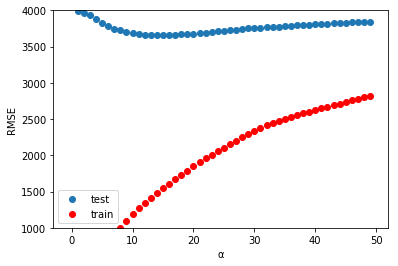

In [34]:
plt.scatter(np.arange(50),test,label="test")
plt.scatter(np.arange(50),train,color="red",label="train")
plt.xlabel("α")
plt.ylabel("RMSE")
plt.ylim(1000,4000)
plt.legend()

In [35]:
#α:10-20を表示
test[10:20]

array([3683.8484, 3673.5737, 3664.8352, 3660.3843, 3659.9592, 3659.8843,
       3662.291 , 3664.3193, 3667.0264, 3672.3518], dtype=float32)

In [64]:
# LASSO回帰のクラスを読み込み
from sklearn.linear_model import Lasso
# LASSO回帰のインスタンスを生成
model_lasso = Lasso(alpha=15)
# データを学習させる
model_lasso.fit(train_x_data,train_y_data)

Lasso(alpha=15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
#MSEを出力
from sklearn.metrics import mean_squared_error as mse
print("RMSE")
print("train;%.3f"%(mse(train_y_data,model_lasso.predict(train_x_data))**(1/2)))
print("test:%.3f"%(mse(test_y_data,model_lasso.predict(test_x_data))**(1/2)))

RMSE
train;1543.992
test:3659.884


In [129]:
#次は完全に答えを予測
#データ読み込み
df_all=pd.read_csv("all_pro_10.csv")
df_train=df_all.loc[:1951]

# ダミー変数に変換するカテゴリ変数の指定
categorical_variable_names = [ 'address','away', 'away_01', 'away_02',
       'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08',
       'away_09', 'away_10', 'away_11', 'away_score', 'away_team',
       'day of week', 'gameday', 'home', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'home_score', 'home_team', 'match number',
       'main weather', 'match', 'prefecture',"match number","o'clock", 'referee', 
       'stadium', 'stage', 'time', 'tv', 'weather','year', 'stage pre home',
       'stage pre away','time zone']
# カテゴリ変数に一括変換
x_dummy = pd.get_dummies(df_all[categorical_variable_names])

#yを定義
y=np.array(df_train["y"]).reshape(-1,1)
#y_std=StandardScaler().fit_transform(y)


df_all.drop((categorical_variable_names+[ 'Unnamed: 0','y']), axis=1, inplace=True)

# それ以外の変数は正規化
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(df_all)
x_train_std = pd.DataFrame(x_train_std, columns=df_all.columns)

# 入力データの完成
x = pd.concat([x_train_std, x_dummy], axis=1)

#分割
x_train = x.loc[:1951]
x_test = x.loc[1952:]

In [130]:
#lassoのクラスを読み込み
from sklearn.linear_model import Lasso
# lassoのインスタンスを生成
model_en= Lasso(alpha=14.8)
# データを学習させる
model_en.fit(x_train, y)

Lasso(alpha=14.8, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)